In [1]:
print('22 paskaita')

22 paskaita


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import sqlite3
import mysql.connector as cnt
import plotly.express as px

In [3]:
from manoFunkcijos import *

In [4]:
#prisijungimas prie mySQL, ir kursoriaus sukūrimas
DB = cnt.connect(
    host = '88.223.121.130',
    user='user',
    password='slaptazodis',
    port=3306,
    database='works'
    )
C=DB.cursor()

In [5]:
#sql užklausos vykdymas per mysql/mariadb kursorių
sql="""
select lytis, count(*),
avg(bdu_spalio)
from DUS2014N
group by lytis;
"""
C.execute(sql)
ans = C.fetchall()
lytis, kiekis, atlyginimas = list(map(list, zip(*ans)))
#? = np.transpose(ans)

In [6]:
pout(ans)

| 0 |       F        |     22366      |2097.37965841008|
| 1 |       M        |     22586      |2633.69374391215|


In [11]:
atlyginimas = list(map(lambda x: x/3.4528, atlyginimas))

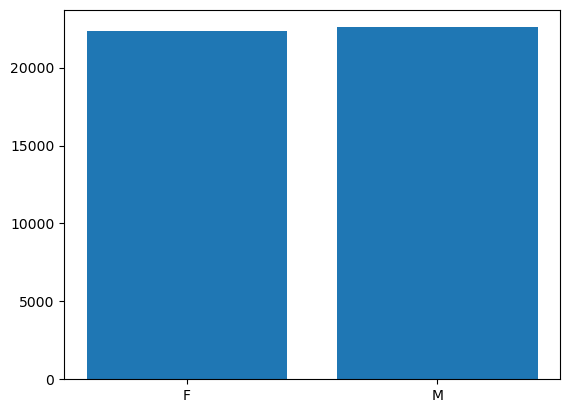

In [12]:
fig, axis = plt.subplots()

axis.bar(lytis, kiekis)

plt.show()

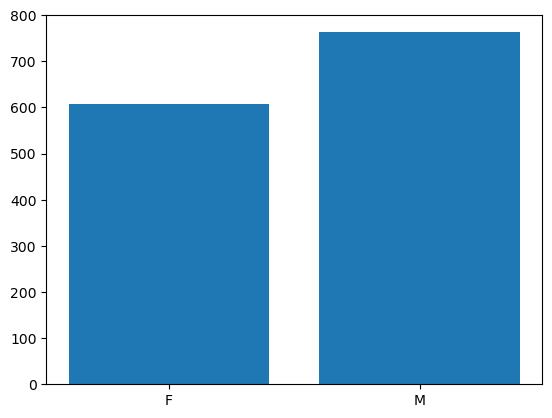

In [13]:
fig, axis = plt.subplots()

axis.bar(lytis, atlyginimas)

plt.show()

In [14]:
#sql užklausos vykdymas per mysql/mariadb kursorių
sql="""select *, C/(select count(*) from sa)*100 as '%' from
(select * from
(select device_brand as B, count(*) as C
from sa
where device_brand != ''
group by device_brand
order by C desc
limit 5) as T1
union all
select 'Others', count(*) as C
from sa
where device_brand not in
(select B from (select device_brand as B, count(*) as C
from sa
where device_brand != ''
group by device_brand
order by C desc
limit 5) as T2)) as T3;"""
C.execute(sql)
ans = C.fetchall()
gamintojai, kiekiai, dalis = list(map(list, zip(*ans)))
pout(ans)

Rodoma 5 eilutės iš 6
| 0 |    Samsung     |     36290      |    30.4927     |
| 1 |     Nokia      |     35186      |    29.5651     |
| 2 |   BlackBerry   |      7161      |     6.0170     |
| 3 |       LG       |      5194      |     4.3643     |
| 4 |  SonyEricsson  |      4090      |     3.4366     |


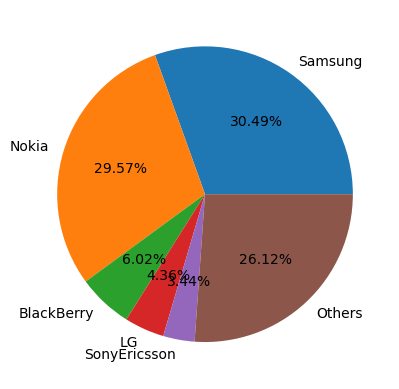

In [18]:
fig, axis = plt.subplots()

axis.pie(kiekiai, labels=gamintojai, autopct='%.2f%%')

plt.show()

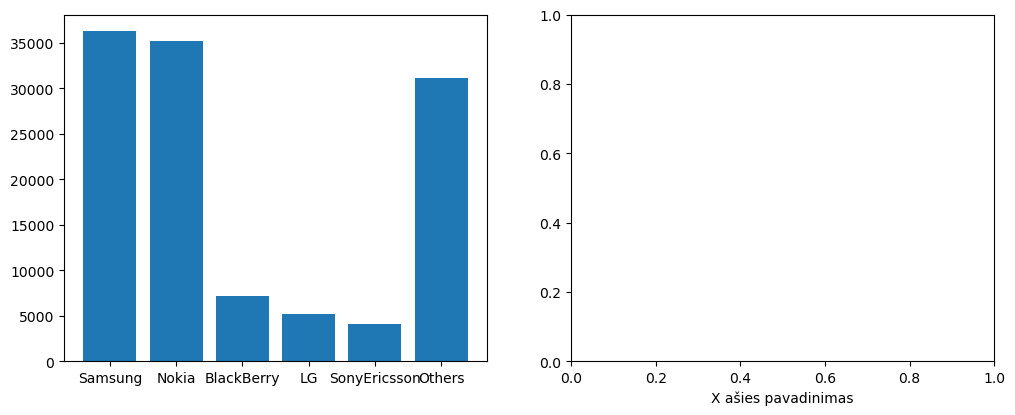

In [24]:
fig, axes = plt.subplots(1,2, figsize=[12,4.5])
axes[0].bar(gamintojai, kiekiai)
axes[1].set_xlabel('X ašies pavadinimas')
plt.show()

In [30]:
#sql užklausos vykdymas per mysql/mariadb kursorių
sql="""with D14 as
(select case
when amzius in ('14-19', '20-29') then '14-29'
else amzius
end as A, count(*)
from DUS2014N
group by A),
D18 as
(select amzius, count(*)
from DUS2018N
group by amzius)
select * from D14 join D18 on D14.A = D18.amzius;"""
C.execute(sql)
ans = C.fetchall()
gr, C14, gr_, C18 = list(map(list, zip(*ans)))
pout(ans)
#? = np.transpose(ans)

| 0 |     14-29      |      9362      |     14-29      |      9368      |
| 1 |     30-39      |      9747      |     30-39      |      9282      |
| 2 |     40-49      |     10947      |     40-49      |      9421      |
| 3 |     50-59      |     10968      |     50-59      |     10056      |
| 4 |      60+       |      3928      |      60+       |      5037      |


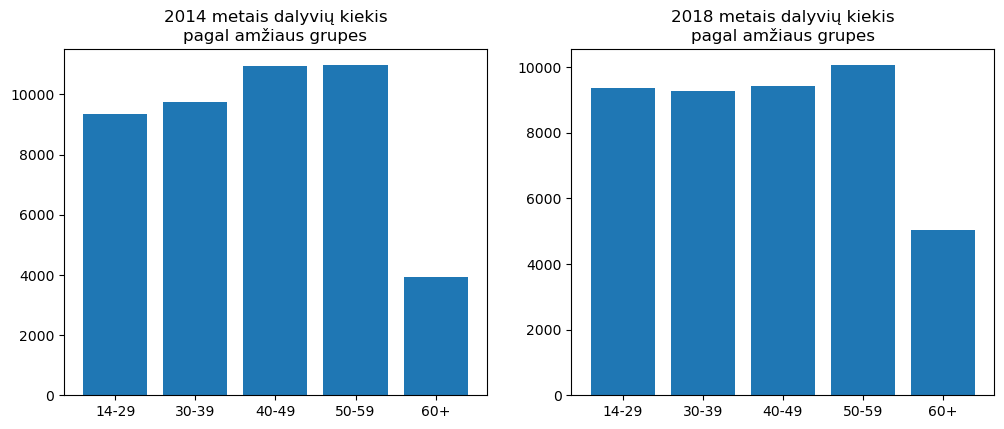

In [34]:
fig, axes = plt.subplots(1,2, figsize=[12,4.5])

axes[0].bar(gr, C14)
axes[1].bar(gr_, C18)
axes[0].set_title('2014 metais dalyvių kiekis\npagal amžiaus grupes')
axes[1].set_title('2018 metais dalyvių kiekis\npagal amžiaus grupes')
plt.show()

In [35]:
#sql užklausos vykdymas per mysql/mariadb kursorių
sql="""with D14f as
(select case
when amzius in ('14-19', '20-29') then '14-29'
else amzius
end as A, count(*)
from DUS2014N
where lytis = 'F'
group by A),
D14m as
(select case
when amzius in ('14-19', '20-29') then '14-29'
else amzius
end as A, count(*)
from DUS2014N
where lytis = 'M'
group by A)
select * from D14f join D14m using (A);"""
C.execute(sql)
ans = C.fetchall()
gr, D14f, D14m = list(map(list, zip(*ans)))
#? = np.transpose(ans)
pout(ans)

| 0 |     14-29      |      4080      |      5282      |
| 1 |     30-39      |      4551      |      5196      |
| 2 |     40-49      |      5879      |      5068      |
| 3 |     50-59      |      5956      |      5012      |
| 4 |      60+       |      1900      |      2028      |


In [37]:
#sql užklausos vykdymas per mysql/mariadb kursorių
sql="""with D18f as
(select amzius, count(*)
from DUS2018N
where lytis = 'F'
group by amzius),
D18m as
(select amzius, count(*)
from DUS2018N
where lytis = 'M'
group by amzius)
select * from D18f join D18m using (amzius);"""
C.execute(sql)
ans = C.fetchall()
gr, D18f, D18m = list(map(list, zip(*ans)))
#? = np.transpose(ans)
pout(ans)

| 0 |     14-29      |      4291      |      5077      |
| 1 |     30-39      |      4118      |      5164      |
| 2 |     40-49      |      4670      |      4751      |
| 3 |     50-59      |      5186      |      4870      |
| 4 |      60+       |      2423      |      2614      |


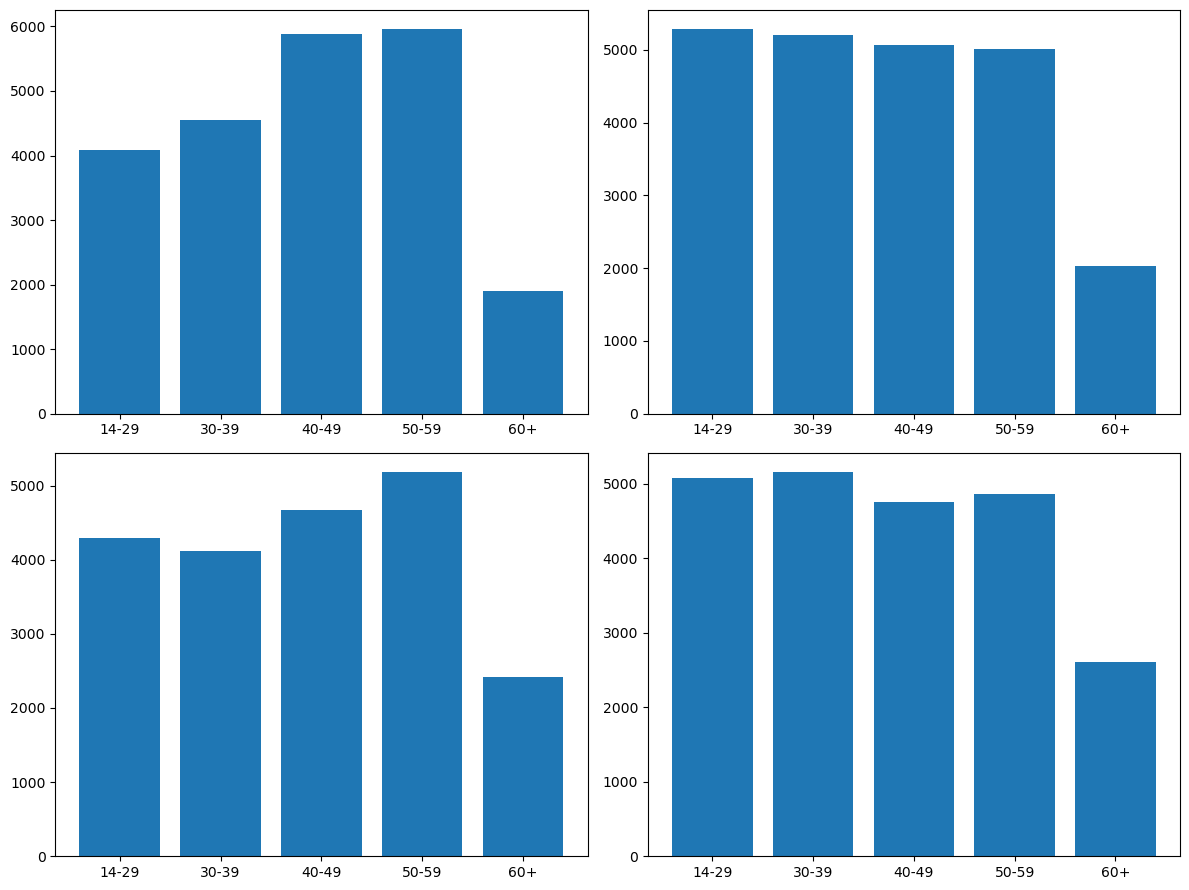

In [39]:
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2,2, figsize=(12,9), gridspec_kw={'width_ratios':[1,1], 'height_ratios':[1,1]})
#ax1:
#plotting code:
ax1.bar(gr, D14f)

#ax1.legend(loc='best')
#ax2:
#plotting code:
ax2.bar(gr, D14m)

#ax2.legend(loc='best')
#ax3:
#plotting code:

ax3.bar(gr, D18f)

#ax3.legend(loc='best')
#ax4:
#plotting code:
ax4.bar(gr, D18m)

#ax4.legend(loc='best')
fig.tight_layout()
plt.show()

In [ ]:
# 2018 metams, parodykite vaizdžiai vidutinio atlyginimo 
# priklausomybę nuo amžiaus grupės, 
# atskirai vyrams, atskirai moterims.

In [40]:
#sql užklausos vykdymas per mysql/mariadb kursorių
sql="""with A as 
(select amzius, avg(bdu_spalio)
from DUS2018N
where lytis = 'F'
group by amzius),
B as
(
select amzius, avg(bdu_spalio)
from DUS2018N
where lytis = 'M'
group by amzius
)
select * from A join B using (amzius);"""
C.execute(sql)
ans = C.fetchall()
amzius, mot, vyr = list(map(list, zip(*ans)))
#? = np.transpose(ans)
pout(ans)

| 0 |     14-29      |    777.5348    |    939.9636    |
| 1 |     30-39      |    971.0401    |   1182.9868    |
| 2 |     40-49      |    887.6261    |   1072.4953    |
| 3 |     50-59      |    777.8344    |    939.3762    |
| 4 |      60+       |    702.1246    |    860.9380    |


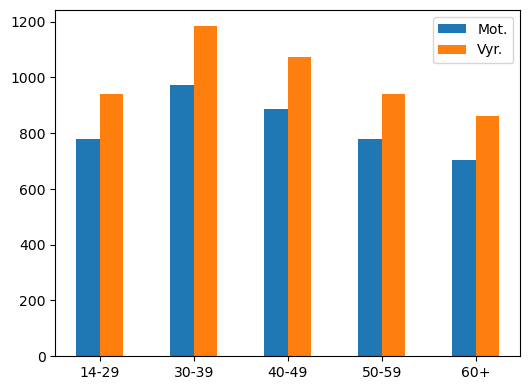

In [44]:
fig, axis = plt.subplots(figsize=[6,4.5])

x = np.arange(0,len(amzius))
w = 0.25
axis.bar(x-w/2,mot, label='Mot.', width=w)
axis.bar(x+w/2, vyr, label='Vyr.', width=w)

axis.set_xticks(x)
axis.set_xticklabels(amzius)

axis.legend(loc='best')
plt.show()

In [ ]:
# -- • Raskite 5-kis populiariausius autopliuslt skelbimuose  
# -- esančius gamintojus, suraskite, kokia buvo kiekvienam  
# -- iš šių gamintojų automobilių vidutinė kaina, rida,  
# -- automobilių amžius. (viena kompleksinė SQL užklausa)
# -- vizualizuokite šią informaciją stulpeline ar kitokia diagrama

In [58]:
#sql užklausos vykdymas per mysql/mariadb kursorių
sql="""select gamintojas, count(*) as C,
round(avg(cast(replace(replace(rida, ' ', ''), 'km', '') as float))) as VRida,
round(avg(cast(replace(price, ' ', '') as float))) as VKaina,
round(avg(2024-cast(substring(pagaminimo_data, 1, 4) as float)), 2) as VAmzius
from autopliuslt
where rida != 'Nenurodyta'
group by gamintojas
order by C desc
limit 5;"""
C.execute(sql)
ans = C.fetchall()
gamintojas, kiekis, rida, kaina, amzius = list(map(list, zip(*ans)))
#? = np.transpose(ans)
pout(ans)

| 0 |      BMW       |      361       |    263543.0    |    10721.0     |      15.2      |
| 1 |   Volkswagen   |      299       |    246394.0    |     6358.0     |     15.59      |
| 2 |      Audi      |      217       |    252499.0    |     8787.0     |     16.35      |
| 3 | Mercedes-Benz  |      174       |    265764.0    |    15295.0     |     15.11      |
| 4 |     Toyota     |      147       |    211363.0    |     8582.0     |     14.53      |


In [60]:
#sql užklausos vykdymas per mysql/mariadb kursorių
sql="""select
round(avg(2024-cast(substring(pagaminimo_data, 1, 4) as float)), 2) as VAmzius
from autopliuslt
"""
C.execute(sql)
ans = C.fetchall()
amz = ans[0][0]
print(amz)
#? = np.transpose(ans)

15.2


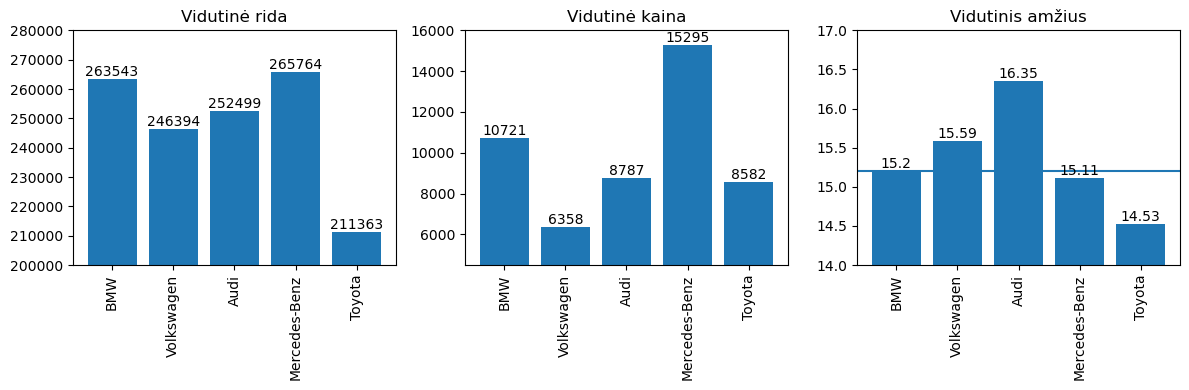

In [65]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=[12,4], gridspec_kw={'width_ratios':[1,1,1]})
P1 = ax1.bar(gamintojas, rida)
ax1.set_ylim(20e4, 28e4)
ax1.tick_params(axis='x', rotation=90)
ax1.bar_label(P1)
ax1.set_title('Vidutinė rida')
P2 = ax2.bar(gamintojas, kaina)
ax2.bar_label(P2)
ax2.set_ylim(4500, 16000)
ax2.tick_params(axis='x', rotation=90)
P3 = ax3.bar(gamintojas, amzius)
ax2.set_title('Vidutinė kaina')
ax3.bar_label(P3)
ax3.set_ylim(14,17)
ax3.tick_params(axis='x', rotation=90)
ax3.axhline(y=amz)
ax3.set_title('Vidutinis amžius')
fig.tight_layout()
plt.show()

In [ ]:
# -- Sugrupuokite automobilius pagal jų amžių, ir suraskite
# -- vidutinę kainą kiekvienam amžiui.
# -- Ar didėjant automobilių amžiui, jų kaina yra linkusi mažėti?
# -- Pateikite vizualizaciją, atsakančią į pateiktą klausimą.
# -- Sugrupuokite automobilius pagal ridą, intervalais kas 5000 km, ir suraskite vidutinę kainą
# -- kiekviename intervale. Apvalinimas turi būti į
# -- didesnę pusę: 500 km turi tapti 5000 km.
# -- Ar didėjant ridai, automobilių kaina yra linkusi mažėti?
# -- Pateikite vizualizaciją, atsakančią į pateiktą klausimą.

In [66]:
#sql užklausos vykdymas per mysql/mariadb kursorių
sql="""select Rida, round(avg(Kaina), 2) as P
from
(select 
ceil(cast(replace(replace(rida, ' ', ''), 'km', '') as float) / 5000.0) * 5000.0
as Rida,
cast(replace(price, ' ', '') as float) as Kaina
from autopliuslt
where rida != 'Nenurodyta')
as T
group by Rida;"""
C.execute(sql)
ans = C.fetchall()
R, P = list(map(list, zip(*ans)))
#? = np.transpose(ans)
pout(ans)

Rodoma 5 eilutės iš 107
| 0 |     5000.0     |    25821.84    |
| 1 |    10000.0     |    28285.0     |
| 2 |    15000.0     |    21555.27    |
| 3 |    20000.0     |    41190.0     |
| 4 |    25000.0     |    63493.75    |


In [69]:
#sql užklausos vykdymas per mysql/mariadb kursorių
sql="""select Am, round(avg(K),2) as P
from
(select 
2024-cast(substring(pagaminimo_data, 1, 4) as float) as Am,
cast(replace(price, ' ', '') as float) as K
from
autopliuslt) as T1
group by Am
order by Am asc;"""
C.execute(sql)
ans = C.fetchall()
Amz, Pa = list(map(list, zip(*ans)))
#? = np.transpose(ans)

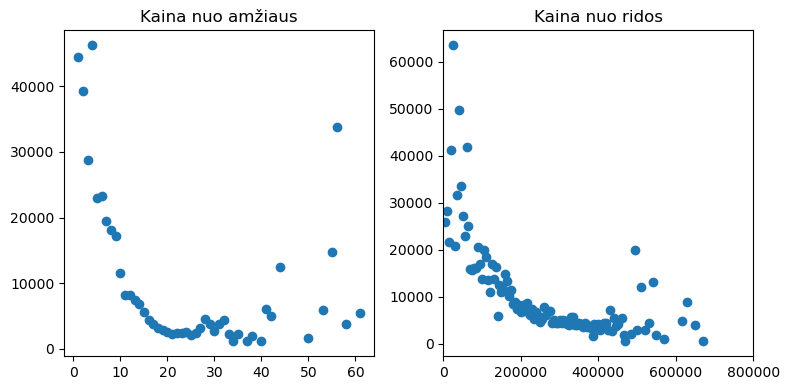

In [73]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,4), gridspec_kw={'width_ratios':[1,1]})
#ax1:
#plotting code:
ax1.scatter(Amz, Pa)
ax1.set_title('Kaina nuo amžiaus')
#ax1.legend(loc=1)
#ax2:
#plotting code:
ax2.scatter(R,P)
ax2.set_xlim(0,0.8e6)
ax2.set_title('Kaina nuo ridos')
#ax2.legend(loc='best')
fig.tight_layout()
plt.show()